In [1]:
import harmonica as hm

In [2]:
dipole = (20, 40, -50)
magnetic_moment = (100, 100, 100)

In [3]:
coordinates = (20, 40, 10)

In [4]:
b_e, b_n, b_u = hm.dipole_magnetic(coordinates, dipole, magnetic_moment, field="b")
print(b_e, b_n, b_u)

-0.04629629632149888 -0.04629629632149888 0.09259259264299775


In [5]:
b_u = hm.dipole_magnetic(
   coordinates, dipole, magnetic_moment, field="b_u"
)
print(b_u)

0.09259259264299775


In [6]:
import verde as vd

region = (-100, 100, -100, 100)
spacing = 1
height = 0
coordinates = vd.grid_coordinates(
   region=region, spacing=spacing, extra_coords=height
)

In [7]:
import numpy as np

easting = [25, 35, -30, -50]
northing = [3, -38, 22, -30]
upward = [-200, -100, -300, -150]
dipoles = (easting, northing, upward)

mag_e = [1e3, 2e3, 500, 2e3]
mag_n = [1e3, 2e3, 500, 2e3]
mag_u = [1e3, 2e3, 500, 2e3]
magnetic_moments = (mag_e, mag_n, mag_u)

In [8]:
b_e, b_n, b_u = hm.dipole_magnetic(coordinates, dipoles, magnetic_moments, field="b")

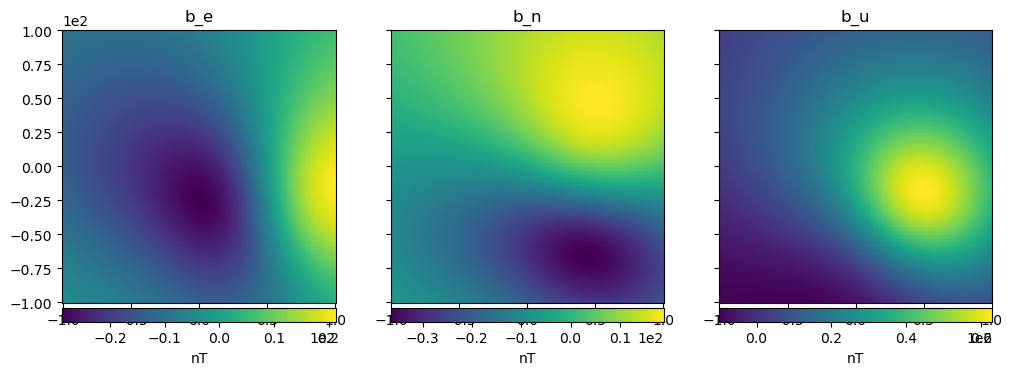

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 8))

fields = {"b_e": b_e, "b_n": b_n, "b_u": b_u}
for field, ax in zip(fields, axes):
   tmp = ax.pcolormesh(coordinates[0], coordinates[1], fields[field])
   ax.set_aspect("equal")
   ax.set_title(field)
   ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="both")
   plt.colorbar(tmp, ax=ax, orientation="horizontal", label="nT", pad=0.008)
plt.show()